# Setup

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import operator
import re
import inspect
from collections import defaultdict
from matplotlib import pyplot as plt

In [2]:
TRAIN_PATH = os.environ['TRAINING_DATA_LOCATION']
TEST_PATH = os.environ['TEST_DATA_LOCATION']

# Load data

In [3]:
train_df = pd.read_csv(*tf.io.gfile.glob(os.path.join(TRAIN_PATH, '*.csv')))
test_df = pd.read_csv(*tf.io.gfile.glob(os.path.join(TEST_PATH, '*.csv')))

In [4]:
train_df

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [5]:
test_df

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


# Analyze text length

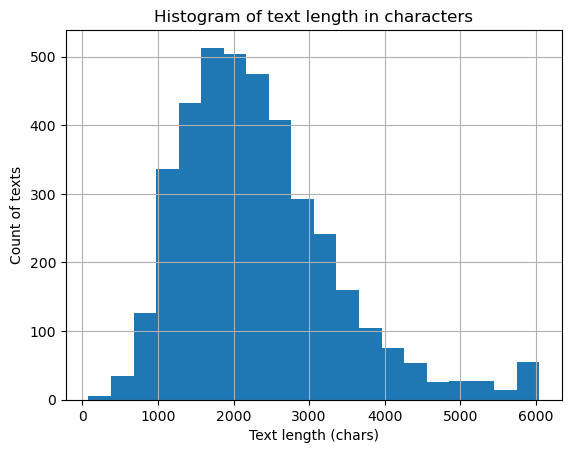

In [6]:
train_df.full_text.str.len().hist(bins=20)
plt.title("Histogram of text length in characters")
plt.xlabel('Text length (chars)')
_ = plt.ylabel('Count of texts')

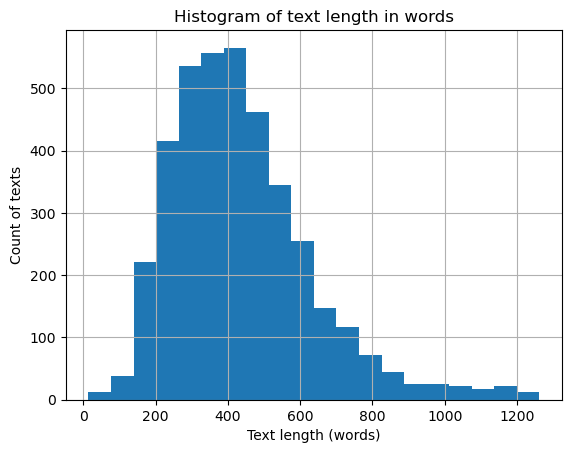

In [7]:
train_df.full_text.str.replace(r'\W+', '|', regex=True).str.split('|').map(len).hist(bins=20)
plt.title("Histogram of text length in words")
plt.xlabel('Text length (words)')
_ = plt.ylabel('Count of texts')

# Analize scores

In [8]:
train_df.columns

Index(['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'],
      dtype='object')

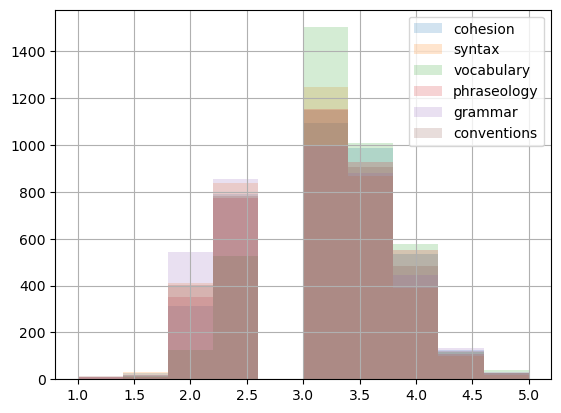

In [9]:
target_columns = [
    'cohesion', 'syntax', 'vocabulary',
    'phraseology', 'grammar', 'conventions'
]
for target_column in target_columns:
    train_df[target_column].hist(alpha=0.2, legend=target_column)
_ = plt.legend()